In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from aerobot.io import load_training_data, load_validation_data
from aerobot.utls import process_data, count_aa_kmers, download_genomes_from_assembly
from aerobot.models import LogisticClassifier

from matplotlib import pyplot as plt

import viz
colors = viz.plotting_style()
default_pal = [
    colors['red'], colors['blue'], colors['green'], 
    colors['purple'], colors['dark_green'], colors['dark_brown'],
    colors['yellow'], colors['light_red'], colors['light_blue'], 
    colors['light_green'], colors['light_purple']]

In [2]:
# Load training dataset and validation dataset
feature_type = "metadata"
training_data = load_training_data(feature_type=feature_type)
validation_data = load_validation_data(feature_type=feature_type)

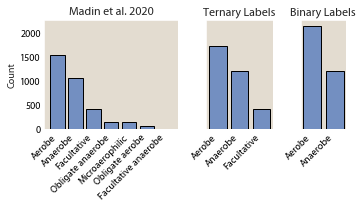

In [3]:
fig, axs = plt.subplots(figsize=(5,3), ncols=3, sharey=True,
                        gridspec_kw={"width_ratios": [2, 1, 2/3]})
c = colors["blue"]

plt.sca(axs[0])
training_labels = training_data["labels"]
counts = training_labels["OXYGEN_REQUIREMENT"].value_counts()

xs = np.arange(counts.size)
#plt.yscale("log")
plt.bar(xs, counts.values, edgecolor="k", lw=1, color=c)
plt.xticks(xs, counts.index, ha='right', rotation=45)
plt.ylabel("Count")
plt.title("Madin et al. 2020")

plt.sca(axs[1])
counts = training_labels["physiology"].value_counts()

xs = np.arange(counts.size)
plt.bar(xs, counts.values, edgecolor="k", lw=1, color=c)
plt.xticks(xs, counts.index, ha='right', rotation=45)
plt.title("Ternary Labels")


plt.sca(axs[2])
counts = training_labels["physiology"].replace(
    "Facultative", "Aerobe").value_counts()

xs = np.arange(counts.size)
plt.bar(xs, counts.values, edgecolor="k", lw=1, color=c)
plt.xticks(xs, counts.index, ha='right', rotation=45)
plt.title("Binary Labels")

plt.tight_layout()
plt.savefig("training_data_summary.png", dpi=300, facecolor="w")
plt.show()


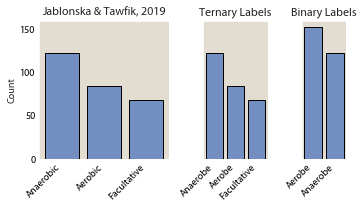

In [4]:
fig, axs = plt.subplots(figsize=(5,3), ncols=3, sharey=True,
                        gridspec_kw={"width_ratios": [2, 1, 2/3]})
c = colors["blue"]

plt.sca(axs[0])
validation_labels = validation_data["labels"]
counts = validation_labels["Oxygen requirement"].value_counts()

xs = np.arange(counts.size)
plt.bar(xs, counts.values, edgecolor="k", lw=1, color=c)
plt.xticks(xs, counts.index, ha='right', rotation=45)
plt.ylabel("Count")
plt.title("Jablonska & Tawfik, 2019")

plt.sca(axs[1])
counts = validation_labels["physiology"].value_counts()

xs = np.arange(counts.size)
plt.bar(xs, counts.values, edgecolor="k", lw=1, color=c)
plt.xticks(xs, counts.index, ha='right', rotation=45)
plt.title("Ternary Labels")


plt.sca(axs[2])
counts = validation_labels["physiology"].replace(
    "Facultative", "Aerobe").value_counts()

xs = np.arange(counts.size)
plt.bar(xs, counts.values, edgecolor="k", lw=1, color=c)
plt.xticks(xs, counts.index, ha='right', rotation=45)
plt.title("Binary Labels")

plt.tight_layout()
plt.savefig("training_data_summary.png", dpi=300, facecolor="w")
plt.show()


In [5]:
# Load model results
model_results_df = pd.read_pickle('logisticReg_l2_c100_models.noNorm.pkl')
model_results_long_df = model_results_df.melt(
    id_vars='feature_set', 
    value_vars=['balanced_accuracy', 'test_balanced_accuracy'],
    value_name='balanced_accuracy', var_name='evaluation').sort_values('balanced_accuracy')
model_results_long_df['eval_name'] = model_results_long_df['evaluation'].map({
    'balanced_accuracy': 'training',
    'test_balanced_accuracy': 'validation'
})

feature_name_map = {
    'Nucleotide kmer counts (1 mer)': 'NT 1-mer',
    'Nucleotide kmer counts (2 mer)': 'NT 2-mer',
    'Nucleotide kmer counts (3 mer)': 'NT 3-mer',
    'Nucleotide kmer counts (4 mer)': 'NT 4-mer',
    'Amino acid counts (1 mer)': 'AA 1-mer',
    'Amino acid counts (2 mer)': 'AA 2-mer',
    'Amino acid counts (3 mer)': 'AA 3-mer',
    'Number of genes': 'Gene count',
    'Number of O2 genes': 'O$_2$ gene count',
    'Percent O2 genes': 'O$_2$ gene fraction',
    'All O2 genes': 'O$_2$ utilizing enzymes',
    'Terminal oxidase genes': 'Terminal oxidases',
    '5 gene set genes': '5 gene set',
    'All KO families': 'KO family counts',
    'genome embedding': 'Genome embedding'}
model_results_long_df['feature_name'] = model_results_long_df['feature_set'].map(
    feature_name_map)
model_results_long_df.head()

/var/folders/h9/fvnb4xnn63qg71jx6ncvg62w0000gn/T/ipykernel_3490/3202003960.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  model_results_long_df = model_results_df.melt(


,feature_set,evaluation,balanced_accuracy,eval_name,feature_name
27,Nucleotide kmer counts (1 mer),test_balanced_accuracy,0.348211,validation,NT 1-mer
11,Nucleotide kmer counts (1 mer),balanced_accuracy,0.386697,training,NT 1-mer
28,Nucleotide kmer counts (2 mer),test_balanced_accuracy,0.421019,validation,NT 2-mer
16,Number of genes,test_balanced_accuracy,0.440509,validation,Gene count
0,Number of genes,balanced_accuracy,0.466482,training,Gene count


In [6]:
model_results_long_df.head()

,feature_set,evaluation,balanced_accuracy,eval_name,feature_name
27,Nucleotide kmer counts (1 mer),test_balanced_accuracy,0.348211,validation,NT 1-mer
11,Nucleotide kmer counts (1 mer),balanced_accuracy,0.386697,training,NT 1-mer
28,Nucleotide kmer counts (2 mer),test_balanced_accuracy,0.421019,validation,NT 2-mer
16,Number of genes,test_balanced_accuracy,0.440509,validation,Gene count
0,Number of genes,balanced_accuracy,0.466482,training,Gene count


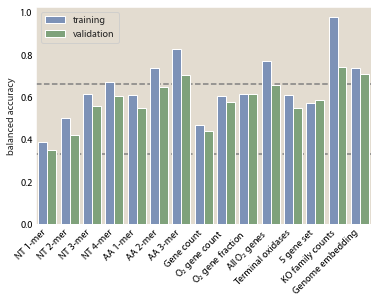

In [7]:
hue_order = 'training,validation'.split(',')
order = 'NT 1-mer,NT 2-mer'
sns.barplot(data=model_results_long_df,
            x='feature_name', y='balanced_accuracy', hue='eval_name', 
            palette=default_pal[1:], order=feature_name_map.values(), 
            hue_order=hue_order)

plt.axhline(0.66, ls='--', color='grey', zorder=-1)
plt.axhline(0.33, ls='--', color='grey', zorder=-1)
plt.legend(title='')
plt.ylabel('balanced accuracy')
plt.xticks(rotation=45, ha='right')
plt.xlabel('')
plt.show()

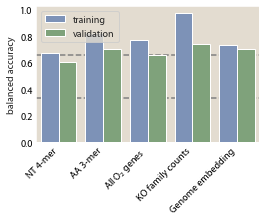

In [8]:
select_models = [
    'Nucleotide kmer counts (4 mer)',
    'Amino acid counts (3 mer)',
    'All O2 genes',
    'All KO families',
    'genome embedding',
]

plt.figure(figsize=(4, 2.5))
hue_order = 'training,validation'.split(',')
order = [feature_name_map[x] for x in select_models]
mask = model_results_long_df.feature_set.isin(select_models)
sns.barplot(data=model_results_long_df[mask],
            x='feature_name', y='balanced_accuracy', hue='eval_name', 
            palette=default_pal[1:], order=order,
            hue_order=hue_order)

plt.axhline(0.66, ls='--', color='grey', zorder=-1)
plt.axhline(0.33, ls='--', color='grey', zorder=-1)
plt.legend(title='', loc=2)
plt.ylabel('balanced accuracy')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

In [9]:
model_results_long_df[mask]

,feature_set,evaluation,balanced_accuracy,eval_name,feature_name
30,Nucleotide kmer counts (4 mer),test_balanced_accuracy,0.603413,validation,NT 4-mer
21,All O2 genes,test_balanced_accuracy,0.655042,validation,All O$_2$ genes
14,Nucleotide kmer counts (4 mer),balanced_accuracy,0.673315,training,NT 4-mer
26,Amino acid counts (3 mer),test_balanced_accuracy,0.704285,validation,AA 3-mer
23,genome embedding,test_balanced_accuracy,0.707161,validation,Genome embedding
7,genome embedding,balanced_accuracy,0.737981,training,Genome embedding
22,All KO families,test_balanced_accuracy,0.740200,validation,KO family counts
5,All O2 genes,balanced_accuracy,0.773037,training,All O$_2$ genes
10,Amino acid counts (3 mer),balanced_accuracy,0.828683,training,AA 3-mer
6,All KO families,balanced_accuracy,0.978323,training,KO family counts
